# **Re-implementing Low-level functions from the Keras library**

In [ ]:
def convolve(kernels: Sequence[np.ndarray], layer: np.ndarray) -> np.ndarray:
   if len(layer.shape) == 2:
       layer = np.expand_dims(layer, axis=0)

   kernel = np.array(kernels)
   k_n, k_h, k_w = kernel.shape

   return np.fromfunction(
       np.vectorize(lambda i, j, k: np.sum(layer[:, i:i + k_h, j:j + k_w] * kernel[k])),
       (layer.shape[1] - k_h + 1, layer.shape[2] - k_w + 1, k_n),
       dtype=int
   )


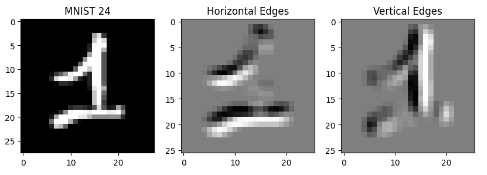

In [ ]:
def relu(feature_map: np.ndarray) -> np.ndarray:
   return np.maximum(0, feature_map)

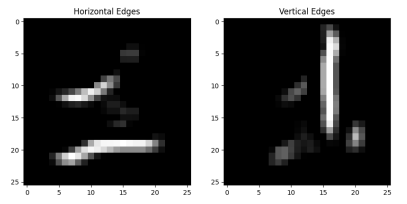

In [ ]:
def max_pooling(layer: np.ndarray, shape: Sequence[int]) -> np.ndarray:
p_h, p_w = shape
l_h, l_w, l_n = layer.shape
return np.fromfunction(
np.vectorize(lambda i, j, c: np.max(layer[i * p_h:(i + 1) * p_h, j * p_w:(j + 1) *
p_w, c])),
(l_h // p_h, l_w // p_w, l_n), dtype=int
)

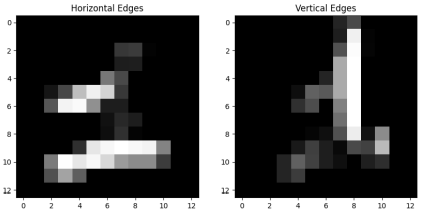

In [ ]:
def normalization(feature_map: np.ndarray) -> np.ndarray:
   n = feature_map.shape[0] * feature_map.shape[1]
   mean = np.sum(feature_map, axis=(0, 1)) / n
   std = np.sqrt(np.sum((feature_map - mean) ** 2, axis=(0, 1)) / n)
   return (feature_map - mean) / std

def fully_connected(feature_map: np.ndarray, weights: np.ndarray) -> np.ndarray:
   flattened = feature_map.reshape(-1, feature_map.shape[-1])
   return np.dot(flattened, weights)

def softmax(layer: np.ndarray) -> np.ndarray:
   exp_layer = np.exp(layer)
   return exp_layer / np.sum(exp_layer)